# Encoding

Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Sample data
data = {'Color': ['Red', 'Green', 'Blue', 'Green', 'Red']}
df = pd.DataFrame(data)

# Label encoding
label_encoder = LabelEncoder()
df['Color_Encoded'] = label_encoder.fit_transform(df['Color'])

print(df)

   Color  Color_Encoded
0    Red              2
1  Green              1
2   Blue              0
3  Green              1
4    Red              2


One-Hot Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Sample data
data = {'Color': ['Red', 'Green', 'Blue', 'Green', 'Red']}
df = pd.DataFrame(data)

# One-hot encoding
one_hot_encoder = OneHotEncoder(sparse=False)
encoded_colors = one_hot_encoder.fit_transform(df[['Color']])

# Convert to a DataFrame
encoded_df = pd.DataFrame(encoded_colors, columns=one_hot_encoder.get_feature_names_out(['Color']))
df = pd.concat([df, encoded_df], axis=1)

print(df)


   Color  Color_Blue  Color_Green  Color_Red
0    Red         0.0          0.0        1.0
1  Green         0.0          1.0        0.0
2   Blue         1.0          0.0        0.0
3  Green         0.0          1.0        0.0
4    Red         0.0          0.0        1.0


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# Scaling

Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

# Sample data
data = {'Age': [25, 45, 35, 50, 23],
        'Income': [50000, 100000, 75000, 120000, 48000]}
df = pd.DataFrame(data)

# Standardization
scaler = StandardScaler()
df[['Age_Standardized', 'Income_Standardized']] = scaler.fit_transform(df[['Age', 'Income']])

print(df)

   Age  Income  Age_Standardized  Income_Standardized
0   25   50000         -0.995228            -1.018936
1   45  100000          0.882561             0.762421
2   35   75000         -0.056334            -0.128258
3   50  120000          1.352008             1.474964
4   23   48000         -1.183007            -1.090191


Min-Max Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Min-Max Normalization
min_max_scaler = MinMaxScaler()
df[['Age_Normalized', 'Income_Normalized']] = min_max_scaler.fit_transform(df[['Age', 'Income']])

print(df)

   Age  Income  Age_Standardized  Income_Standardized  Age_Normalized  \
0   25   50000         -0.995228            -1.018936        0.074074   
1   45  100000          0.882561             0.762421        0.814815   
2   35   75000         -0.056334            -0.128258        0.444444   
3   50  120000          1.352008             1.474964        1.000000   
4   23   48000         -1.183007            -1.090191        0.000000   

   Income_Normalized  
0           0.027778  
1           0.722222  
2           0.375000  
3           1.000000  
4           0.000000  


# Overfitting

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [71]:
# # Generate synthetic data
# np.random.seed(42)
# X = np.random.rand(100, 1) * 10  # Feature (e.g., size of the house)
# y = 2.5 * X**2 + 0.5 * X + np.random.randn(100, 1) * 10  # Quadratic relationship with noise

In [72]:
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Feature (e.g., size of the house)
y = 2.5 * X**2 + 0.5 * X + np.random.randn(100, 1) * 70  # Increased noise level to induce overfitting

In [73]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
# Fit a polynomial regression model with a high degree (overfitting scenario)
poly_features = PolynomialFeatures(degree=15)  # High-degree polynomial
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [75]:
# Predictions
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

In [76]:
# Calculate R² for training and test sets
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

In [77]:
# Print R²
print(f"Training R² (Overfitting): {train_r2:.2f}")
print(f"Test R² (Overfitting): {test_r2:.2f}")

Training R² (Overfitting): 0.61
Test R² (Overfitting): 0.51


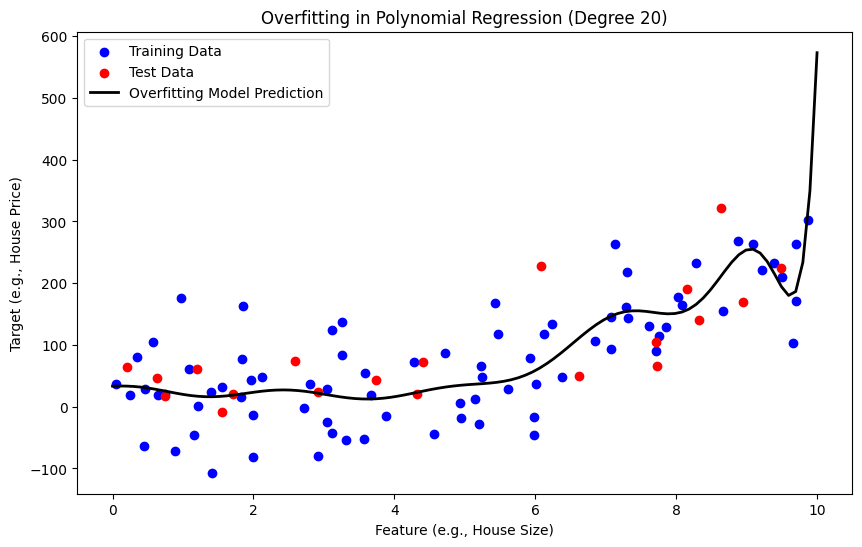

In [78]:
# 6. Plotting the results to show overfitting
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='red', label='Test Data')

X_plot = np.linspace(0, 10, 100).reshape(-1, 1)
X_plot_poly = poly_features.transform(X_plot)
y_plot = model.predict(X_plot_poly)

plt.plot(X_plot, y_plot, color='black', linewidth=2, label='Overfitting Model Prediction')
plt.xlabel("Feature (e.g., House Size)")
plt.ylabel("Target (e.g., House Price)")
plt.title("Overfitting in Polynomial Regression (Degree 20)")
plt.legend()
plt.show()

**Import Required Libraries**

In [79]:
from sklearn.linear_model import Lasso, Ridge

**Apply L1 (Lasso) Regularization**

In [80]:

# Apply L1 (Lasso) Regularization
lasso_model = Lasso(alpha=0.1)  # The alpha value controls the amount of regularization
lasso_model.fit(X_train_poly, y_train)

# Predictions using Lasso
y_train_pred_lasso = lasso_model.predict(X_train_poly)
y_test_pred_lasso = lasso_model.predict(X_test_poly)

# Calculate R² score for Lasso
train_r2_lasso = r2_score(y_train, y_train_pred_lasso)
test_r2_lasso = r2_score(y_test, y_test_pred_lasso)

print(f"Lasso (L1) Training R²: {train_r2_lasso:.2f}")
print(f"Lasso (L1) Test R²: {test_r2_lasso:.2f}")

Lasso (L1) Training R²: 0.58
Lasso (L1) Test R²: 0.54


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.541e+05, tolerance: 7.295e+01
  model = cd_fast.enet_coordinate_descent(


**Apply L2 (Ridge) Regularization**

In [81]:
# Apply L2 (Ridge) Regularization
ridge_model = Ridge(alpha=0.1)  # The alpha value controls the amount of regularization
ridge_model.fit(X_train_poly, y_train)

# Predictions using Ridge
y_train_pred_ridge = ridge_model.predict(X_train_poly)
y_test_pred_ridge = ridge_model.predict(X_test_poly)

# Calculate R² score for Ridge
train_r2_ridge = r2_score(y_train, y_train_pred_ridge)
test_r2_ridge = r2_score(y_test, y_test_pred_ridge)

print(f"Ridge (L2) Training R²: {train_r2_ridge:.2f}")
print(f"Ridge (L2) Test R²: {test_r2_ridge:.2f}")

Ridge (L2) Training R²: 0.61
Ridge (L2) Test R²: 0.51
